<a href="https://colab.research.google.com/github/LaplasDeamon/python_notebooks/blob/main/%D0%9D%D0%B5%D1%81%D0%B1%D0%B0%D0%BB%D0%B0%D0%BD%D1%81%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%BD%D1%8B%D0%B9%20%D0%BA%D1%80%D0%B5%D0%B4%D0%B8%D1%82%D0%BD%D1%8B%D0%B9%20%D1%81%D0%BA%D0%BE%D1%80%D0%B8%D0%BD%D0%B3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# **Задача несбалансированного кредитного скоринга** 

# **Обоснование:**

Кредитный риск является решающим фактором, влияющим на эффективность бизнеса предприятий и банков. Что еще более важно, чрезвычайно высокие кредитные риски могут напрямую привести к банкротству предприятий или банков. Следовательно, разработка моделей оценки кредитоспособности клиентов, которые можно использовать для точного и эффективного прогнозирования возможного дефолта по кредиту, имеет существенное практическое значение. По сути, кредитный скоринг клиентов — это задача бинарной классификации. В частности, в зависимости от степени риска дефолта клиенты делятся на два типа: клиенты с хорошей кредитной историей и клиенты с плохой кредитной историей.
Но существует проблема - перекос данных по положительным исходам к отрицательным. У финансовых организаций мало данных по клиентам с плохой кредитной историей.
 Если не учитывать данную проблему, то модель натренируется хорошо предсказывать положительные исходы, при это качество прогноза по отрицательным будет мало. То есть оценка TPR будет высока при низком TNR.
Чтоб сбалансировать распределение классов, необходимо использовать методы ресемплинга( повторной выборки).
Традиционные методы повторной выборки включают random oversampling (ROS) и random  under-sampling  (RUS).




# **Данные**

Выборка - агрегированные данные одной из МФО( микрофинансовой организации) 

Переменные, характеризующие кредитную историю клиента:

● cred_sum_cc_all - сумма кредитов по кредитным картам

● mfo_inqs_count_month - количество запросов на кредиты в другие в МФО

● all_closed_creds_sum_all - сумма закрытых кредитов

● bank_inqs_count_quarter - количество запросов на кредиты в банки

● cred_max_overdue_max_ly - максимальная просрочка за год

● all_active_creds_sum_all - денежная сумма всех активных кредитов

● mfo_last_days_all - Количество дней с последнего займа в МФО

● cred_sum_cc_ly - Сумма лимитов кредитных карт, оформленных за последний
год

● cred_sum_debt_all_all - Сумма задолженности по всем кредитам

● all_closed_creds_sum_ly - Сумма закрытых кредитов за последний год

● mfo_cred_mean_sum_3lm - Средняя сумма МФО кредитов, выданных за
последние 3 месяца

● delay_more_sum_all - Количество просрочек более чем на 90 дней по всем
кредитам

● all_creds_count_all - Общее количество кредитов

● cred_day_overdue_all_sum_all - Суммарное количество дней просрочки текущих  активных кредитов

● cred_max_overdue_max_3lm - Максимальная сумма просроченной
задолженности, по кредитам взятым за последние 3 месяца

● mfo_closed_count_ly - Количество закрытых МФО кредитов, взятых за
последний год

● cred_sum_overdue_cc_all - Сумма просрочек по кредитным картам

● count_overdue_all_3lm - Количество кредитов на просрочке, взятых за
последние 3 месяца

● all_creds_count_lm - Количество кредитов, взятых за последний месяц

● region - регион подачи заявки

Переменные характеризующие клиента
● work_code - Профессия. 5 - рабочие профессии (слесарь, токарь). 3 - офисный
работник (бухгалтер, программист). 1 - госслужащий (полицейский, медсестра)

● month_income - доход

Целевые переменные:
bad - 1 - кредит просрочен, 0 - кредит возвращен, nan - отказ.

approved - 1 - одобрено, 0 - отказано

# Извлечение признаков

In [ ]:

from sklearn.preprocessing import StandardScaler      
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,f1_score,classification_report,confusion_matrix
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.feature_selection import GenericUnivariateSelect, mutual_info_classif, SelectFromModel
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score
import seaborn as sns
import tensorflow as tf


In [ ]:
df= pd.read_csv('/content/MFO_data.csv',delimiter=',')
df

,order_id,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,...,cred_max_overdue_max_3lm,mfo_closed_count_ly,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region,bad,approved
0,5498546,0.00,0,40364,0,0.00,3000,560,0.0,0.00,...,0.0,0,0.00,0,0,3,50000,46,NaN,0
1,5498604,1500.00,0,23456,0,0.00,0,9999,0.0,0.00,...,0.0,0,0.00,0,0,3,35000,17,NaN,0
2,5498609,0.10,0,17999,3,0.00,9999,9999,0.1,9999.00,...,0.0,0,0.00,0,2,3,35000,58,NaN,0
3,5498645,5000.00,0,313247,0,0.00,0,9999,0.0,0.00,...,0.0,0,4923.97,0,0,5,35000,4,NaN,0
4,5498647,0.00,0,0,1,0.00,0,9999,0.0,0.00,...,0.0,0,0.00,0,0,5,35000,34,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19100,6192317,4406.71,8,366194,41,0.00,431106,6,0.0,423609.76,...,0.0,17,0.00,0,9,4,50000,32,1.0,1
19101,6192444,155000.00,3,217946,2,6771.00,419276,15,0.0,314112.06,...,0.0,17,0.00,0,2,2,50000,36,0.0,1
19102,6192539,30000.00,4,157484,5,8600.00,0,16,0.0,0.00,...,0.0,11,0.00,0,2,4,60000,7,0.0,1
19103,6192655,38000.00,3,339500,1,0.00,27000,1,0.0,27000.00,...,0.0,13,0.00,0,4,2,35000,14,0.0,1


Посмотрим есть ли перекос в данных

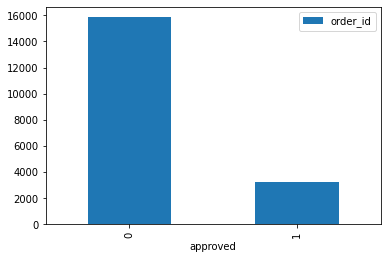

In [ ]:
df.groupby('approved').count().plot(kind='bar',y=['order_id'])

Перекос существенный 

In [ ]:
def show_nan(df):
  missing_values = pd.DataFrame({
    'Column': df.columns.values,
    '# of missing values': df.isna().sum().values,
    '% of missing values': 100 * df.isna().sum().values / len(df),
  })

  missing_values = missing_values[missing_values['# of missing values'] > 0]
  print(missing_values.sort_values(by='# of missing values', 
                                  ascending=False
                                  ).reset_index(drop=True))

Проверим пропущенные значения

In [ ]:
show_nan(df)

  Column  # of missing values  % of missing values
0    bad                15847            82.946873


In [ ]:
df=df.drop('bad',axis=1) # удаление признака
X=df.drop('approved',axis=1).set_index('order_id')
y=df['approved']

Попробуем сократить количество предикторов модели. 


1.   Найдем и удалим признаки с высокой корреляцией
2.   Найдем удалим признаким с малым IG ( приростом информации)



<ipython-input-9-6e685ee062cd>:11: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))


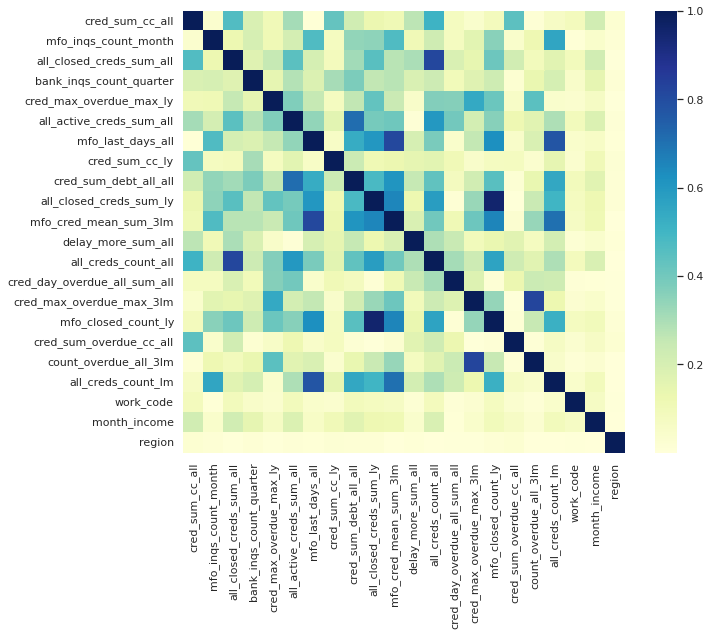

In [ ]:
corr_matrix = X.corr(method = "spearman").abs()

# Draw the heatmap
sns.set(font_scale = 1.0)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr_matrix, cmap= "YlGnBu", square=True, ax = ax)
f.tight_layout()
#plt.savefig("correlation_matrix.png", dpi = 1080)

# Select upper triangle of matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))

In [ ]:
# Найдем индексы фич с коэф корреляции более 0.90
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

# Drop features
importances_corr = X.drop(to_drop, axis = 1)
importances_corr

,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,cred_max_overdue_max_ly,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,all_closed_creds_sum_ly,...,delay_more_sum_all,all_creds_count_all,cred_day_overdue_all_sum_all,cred_max_overdue_max_3lm,cred_sum_overdue_cc_all,count_overdue_all_3lm,all_creds_count_lm,work_code,month_income,region
order_id,,,,,,,,,,,,,,,,,,,,,
5498546,0.00,0,40364,0,0.00,3000,560,0.0,0.00,0,...,2,3,529,0.0,0.00,0,0,3,50000,46
5498604,1500.00,0,23456,0,0.00,0,9999,0.0,0.00,0,...,10,3,0,0.0,0.00,0,0,3,35000,17
5498609,0.10,0,17999,3,0.00,9999,9999,0.1,9999.00,0,...,18,4,0,0.0,0.00,0,2,3,35000,58
5498645,5000.00,0,313247,0,0.00,0,9999,0.0,0.00,0,...,8,5,0,0.0,4923.97,0,0,5,35000,4
5498647,0.00,0,0,1,0.00,0,9999,0.0,0.00,0,...,11,1,0,0.0,0.00,0,0,5,35000,34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6192317,4406.71,8,366194,41,0.00,431106,6,0.0,423609.76,180328,...,0,35,0,0.0,0.00,0,9,4,50000,32
6192444,155000.00,3,217946,2,6771.00,419276,15,0.0,314112.06,166700,...,0,39,0,0.0,0.00,0,2,2,50000,36
6192539,30000.00,4,157484,5,8600.00,0,16,0.0,0.00,97800,...,12,16,0,0.0,0.00,0,2,4,60000,7


<Figure size 1296x648 with 0 Axes>

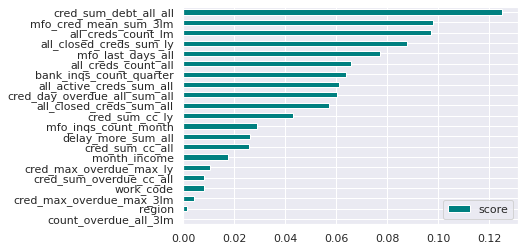

In [ ]:
np.random.seed(4)
importances = mutual_info_classif(importances_corr, y)
plt.figure(figsize=(18, 9))
feature_importances = pd.DataFrame(data={'score':importances}, 
                      index=importances_corr.columns).sort_values(by='score')
feature_importances.plot(kind='barh', color='teal')

Удалим признаки с IG< 0.015

In [ ]:
features_drop=feature_importances[feature_importances['score']<0.015]
X_dropped=X.drop(features_drop.index,axis=1)
X_dropped

,cred_sum_cc_all,mfo_inqs_count_month,all_closed_creds_sum_all,bank_inqs_count_quarter,all_active_creds_sum_all,mfo_last_days_all,cred_sum_cc_ly,cred_sum_debt_all_all,all_closed_creds_sum_ly,mfo_cred_mean_sum_3lm,delay_more_sum_all,all_creds_count_all,cred_day_overdue_all_sum_all,mfo_closed_count_ly,all_creds_count_lm,month_income
order_id,,,,,,,,,,,,,,,,
5498546,0.00,0,40364,0,3000,560,0.0,0.00,0,0.000000,2,3,529,0,0,50000
5498604,1500.00,0,23456,0,0,9999,0.0,0.00,0,0.000000,10,3,0,0,0,35000
5498609,0.10,0,17999,3,9999,9999,0.1,9999.00,0,0.000000,18,4,0,0,2,35000
5498645,5000.00,0,313247,0,0,9999,0.0,0.00,0,0.000000,8,5,0,0,0,35000
5498647,0.00,0,0,1,0,9999,0.0,0.00,0,0.000000,11,1,0,0,0,35000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6192317,4406.71,8,366194,41,431106,6,0.0,423609.76,180328,20335.120000,0,35,0,17,9,50000
6192444,155000.00,3,217946,2,419276,15,0.0,314112.06,166700,17784.000000,0,39,0,17,2,50000
6192539,30000.00,4,157484,5,0,16,0.0,0.00,97800,13233.333333,12,16,0,11,2,60000


In [ ]:
input_dim=len(X_dropped.columns)
input_dim

16

Разделим выборку на тренировочную, валидационную и тестовую. Также нормализуем их

In [ ]:
X_train, X_test_val, y_train, y_test_val = train_test_split(X_dropped, y, test_size = 0.4, random_state = 0)
X_val, X_test, y_val, y_test= train_test_split(X_test_val, y_test_val, test_size = 0.5, random_state = 0)
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_val_std = sc.transform(X_val)
X_test_std = sc.transform(X_test)

Переведем данные в TFDS(TensorFlowDatsets)

In [ ]:
train = tf.data.Dataset.from_tensor_slices((X_train_std, y_train))
val = tf.data.Dataset.from_tensor_slices((X_val_std, y_val))
test = tf.data.Dataset.from_tensor_slices((X_test_std, y_test))

In [ ]:
val_size=len(list(val)) 
train_size=len(list(train))
train_size

11463

In [ ]:
BATCH_SIZE=50
BUFFER_SIZE=1000
VAL_SUBSPLITS = 5
VALIDATION_STEPS = val_size//BATCH_SIZE//VAL_SUBSPLITS
STEPS_PER_EPOCH = train_size // BATCH_SIZE
EPOCH=100

Ускорим обучение модели:
 
1.   Поместив данные в буффер 
2.   Установим батчи
3.   Создадим предварительную загрузку






In [ ]:
train_dataset = train.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test.batch(BATCH_SIZE)
val_dataset = val.batch(BATCH_SIZE)
shape=train_dataset.element_spec[0].shape

##Keras

In [ ]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers,activations, optimizers, losses, metrics
from keras.layers import Input,Dense,BatchNormalization,Dropout,Activation
import optuna
from tensorflow.keras.optimizers.schedules import ExponentialDecay, PiecewiseConstantDecay, PolynomialDecay, InverseTimeDecay

In [ ]:
tf.random.set_seed(4)
histories=[]
def optuna_objective(trial: optuna.trial.Trial):
    esc = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
    model = keras.Sequential(
        [
            layers.Input(input_dim,),
            layers.Dense(
                units=trial.suggest_int('l1_neurons', 16, 128),
                activation=trial.suggest_categorical('l1_activation', ['sigmoid','softplus', 'relu'])
            ),
            layers.Dropout(rate=trial.suggest_uniform('dr1', 0.1, 0.5)),
            layers.Dense(
                units=trial.suggest_int('l2_neurons', 4, 64),
                activation=trial.suggest_categorical('l2_activation', ['sigmoid','softplus' ,'relu'])
            ),
            layers.Dropout(rate=trial.suggest_uniform('dr2', 0.1, 0.5)),
            layers.Dense(
                units=trial.suggest_int('l3_neurons', 4, 64),
                activation=trial.suggest_categorical('l3_activation', ['sigmoid','softplus', 'relu'])
            ),
            layers.Dropout(rate=trial.suggest_uniform('dr3', 0.1, 0.5)),
            layers.Dense(
                units=trial.suggest_int('l4_neurons', 4, 32),
                activation=trial.suggest_categorical('l4_activation', ['sigmoid','softplus', 'relu'])
            ),
            layers.Dropout(rate=trial.suggest_uniform('dr4', 0.1, 0.5)),
            layers.Dense(
                units=trial.suggest_int('l5_neurons', 4, 32),
                activation=trial.suggest_categorical('l5_activation', ['sigmoid', 'relu'])
            ),
            layers.Dense(1, activation=activations.sigmoid)
            ])
    sch = PolynomialDecay(initial_learning_rate=1e-2, decay_steps=EPOCH, end_learning_rate=5e-4)
    optimizer = tf.keras.optimizers.Adam(learning_rate=sch)
    model.compile(
    optimizer,
    #optimizer=optimizers.RMSprop(learning_rate=sch),
    loss='binary_crossentropy', 
    #metrics=[keras.metrics.Accuracy,keras.metrics.Recall,keras.metrics.AUC]
    metrics=['accuracy','AUC']
    )
    history = model.fit(train_dataset,
                        steps_per_epoch=STEPS_PER_EPOCH,
                        validation_steps=VALIDATION_STEPS,
                        epochs=EPOCH,
                        validation_data=val_dataset, 
                        verbose=0,
                        callbacks=[esc])
    histories.append(history.history)
    accuracy = history.history['val_accuracy'][-1]
    return accuracy

In [ ]:
study = optuna.create_study(direction='maximize')

[I 2022-12-22 15:20:00,962] A new study created in memory with name: no-name-f8defdff-0659-4174-8b33-6b9ee062a7d1


In [ ]:
study.optimize(optuna_objective, n_trials=30)

<ipython-input-86-3143b5396a47>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  layers.Dropout(rate=trial.suggest_uniform('dr1', 0.1, 0.5)),
<ipython-input-86-3143b5396a47>:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  layers.Dropout(rate=trial.suggest_uniform('dr2', 0.1, 0.5)),
<ipython-input-86-3143b5396a47>:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  layers.Dropout(rate=trial.suggest_uniform('dr3', 0.1, 0.5)),
<ipython-input-86-3143b5396a47>:27: FutureWarning: suggest

(0.0, 1.0)

<Figure size 1296x648 with 0 Axes>

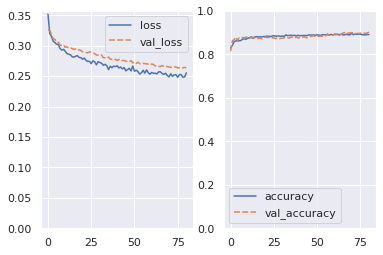

In [ ]:
df = pd.DataFrame(histories[study.best_trial.number])
plt.figure(figsize=(18,9))
f, axes = plt.subplots(1, 2)

ax = sns.lineplot( data=df[['loss', 'val_loss']],ax=axes[0])
ax.set_ylim(0)

ax = sns.lineplot(data=df[['accuracy', 'val_accuracy']], ax=axes[1])
ax.set_ylim(0, 1)

In [ ]:
study.best_params

{'l1_neurons': 118,
 'l1_activation': 'sigmoid',
 'dr1': 0.2906392070058582,
 'l2_neurons': 46,
 'l2_activation': 'relu',
 'dr2': 0.22353927054901881,
 'l3_neurons': 33,
 'l3_activation': 'softplus',
 'dr3': 0.3887570760865239,
 'l4_neurons': 32,
 'l4_activation': 'sigmoid',
 'dr4': 0.33382862034037575,
 'l5_neurons': 8,
 'l5_activation': 'relu'}

In [ ]:
inputs = Input((input_dim,))
x = Dense(95)(inputs) 
#x = BatchNormalization()(x)   
x = Activation("softplus")(x)
x = Dropout(0.27656976092043906)(x)

x = Dense(36)(x) 
#x = BatchNormalization()(x)   
x = Activation("sigmoid")(x)
x = Dropout(0.2053660696522807)(x)

x = Dense(35)(x) 
#x = BatchNormalization()(x)   
x = Activation("sigmoid")(x)
x = Dropout(0.1540048276709568)(x)
                                 
x = Dense(18)(x) 
#x = BatchNormalization()(x)   
x = Activation("sigmoid")(x)
x = Dropout(0.10887568955449439)(x)

x = Dense(4)(x) 
#x = BatchNormalization()(x)   
x = Activation("sigmoid")(x)
outputs = Dense(1, activation='sigmoid')(x)  
model =keras.models.Model(inputs, outputs)

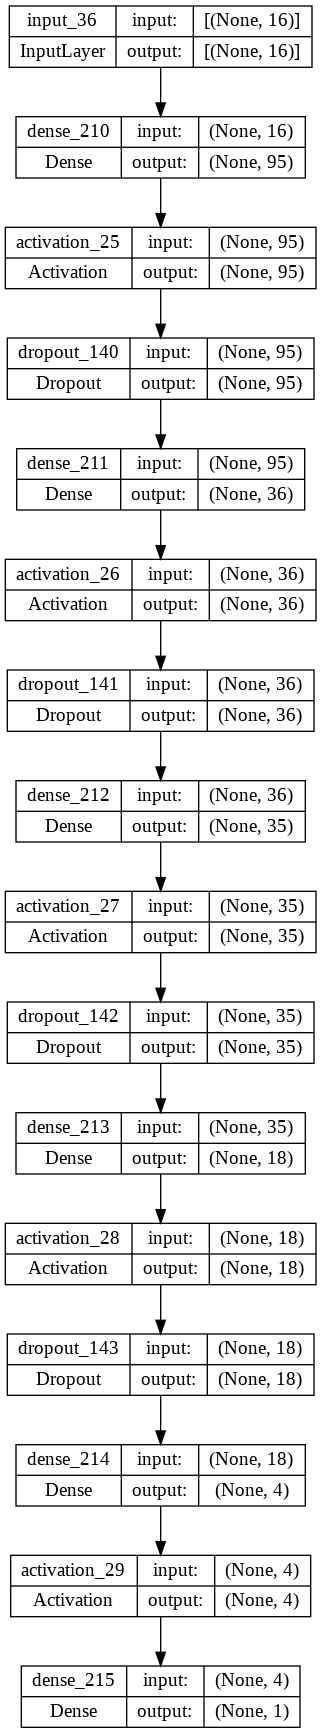

In [ ]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [ ]:
esc = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
sch = PolynomialDecay(initial_learning_rate=1e-2, decay_steps=100, end_learning_rate=5e-4)
optimizer = tf.keras.optimizers.Adam(learning_rate=sch)
model.compile(
  optimizer,
      #optimizer=optimizers.RMSprop(learning_rate=sch),
  loss='binary_crossentropy', 
  metrics=['accuracy']
  )
history = model.fit(train_dataset,
                    steps_per_epoch=STEPS_PER_EPOCH,
                    validation_steps=VALIDATION_STEPS,
                    epochs=100,
                    validation_data=test_dataset
                    #callbacks=[esc]
                    )

Epoch 1/100
229/229 [==============================] - 1s 3ms/step - loss: 0.3529 - accuracy: 0.8323 - val_loss: 0.3272 - val_accuracy: 0.8320
Epoch 2/100
229/229 [==============================] - 1s 3ms/step - loss: 0.3163 - accuracy: 0.8536 - val_loss: 0.3210 - val_accuracy: 0.8653
Epoch 3/100
229/229 [==============================] - 1s 3ms/step - loss: 0.3096 - accuracy: 0.8601 - val_loss: 0.3157 - val_accuracy: 0.8667
Epoch 4/100
229/229 [==============================] - 1s 3ms/step - loss: 0.3057 - accuracy: 0.8708 - val_loss: 0.3103 - val_accuracy: 0.8693
Epoch 5/100
229/229 [==============================] - 1s 3ms/step - loss: 0.3008 - accuracy: 0.8694 - val_loss: 0.3058 - val_accuracy: 0.8693
Epoch 6/100
229/229 [==============================] - 1s 3ms/step - loss: 0.2992 - accuracy: 0.8724 - val_loss: 0.3014 - val_accuracy: 0.8720
Epoch 7/100
229/229 [==============================] - 1s 2ms/step - loss: 0.2944 - accuracy: 0.8727 - val_loss: 0.2980 - val_accuracy: 0.8707

(0.0, 1.0)

<Figure size 1296x648 with 0 Axes>

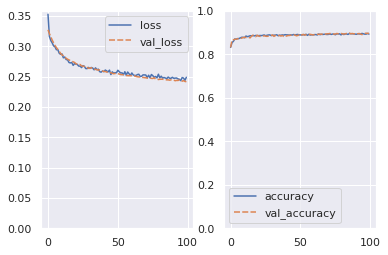

In [ ]:
df = pd.DataFrame(history.history)
plt.figure(figsize=(18,9))
f, axes = plt.subplots(1, 2)

ax = sns.lineplot( data=df[['loss', 'val_loss']],ax=axes[0])
ax.set_ylim(0)

ax = sns.lineplot(data=df[['accuracy', 'val_accuracy']], ax=axes[1])
ax.set_ylim(0, 1)

In [ ]:
y_pred_keras=model.predict(X_test_std)

120/120 [==============================] - 0s 1ms/step


In [ ]:
y_pred_keras=list(map(lambda x: round(x), y_pred_keras.reshape(-1)))


In [ ]:
CM=confusion_matrix(y_test,y_pred_keras)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print('f1',f1_score(y_test,y_pred_keras,average='macro'))
print('TPR',TPR)
print('TNR',TNR)

f1 0.8228318233679088
TPR 0.6435185185185185
TNR 0.960605105578317


#Imbalanced learning

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

##Oversampling

In [ ]:
oversample =RandomOverSampler(sampling_strategy=0.25)

In [ ]:
X_over, y_over = oversample.fit_resample(X_dropped, y)

In [ ]:
print(Counter(y))

Counter({0: 15847, 1: 3258})


In [ ]:
print(Counter(y_over))

Counter({0: 15847, 1: 3961})


In [ ]:
X_train_over, X_test_val_over, y_train_over, y_test_val_over = train_test_split(X_over, y_over, test_size = 0.4, random_state = 0)
X_val_over, X_test_over, y_val_over, y_test_over= train_test_split(X_test_val_over, y_test_val_over, test_size = 0.5, random_state = 0)
sc = StandardScaler()
sc.fit(X_train_over)
X_train_std_over = sc.transform(X_train_over)
X_val_std_over = sc.transform(X_val_over)
X_test_std_over = sc.transform(X_test_over)

In [ ]:
train_over = tf.data.Dataset.from_tensor_slices((X_train_std_over, y_train_over))
val_over = tf.data.Dataset.from_tensor_slices((X_val_std_over, y_val_over))
test_over = tf.data.Dataset.from_tensor_slices((X_test_std_over, y_test_over))

In [ ]:
val_size_over=len(list(val_over)) 
train_size_over=len(list(train_over))
VALIDATION_STEPS_OVER = val_size_over//BATCH_SIZE//VAL_SUBSPLITS
STEPS_PER_EPOCH_OVER = train_size_over // BATCH_SIZE

In [ ]:
train_dataset_over = train_over.shuffle(BUFFER_SIZE).cache().batch(BATCH_SIZE).repeat()
train_dataset_over = train_dataset_over.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset_over = test_over.batch(BATCH_SIZE)
val_dataset_over = val_over.batch(BATCH_SIZE)
shape=train_dataset.element_spec[0].shape

###Keras ROS

In [ ]:
tf.random.set_seed(4)
histories_over=[]
def optuna_objective_over(trial: optuna.trial.Trial):
    esc = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
    model = keras.Sequential(
        [
            layers.Input(input_dim,),
            layers.Dense(
                units=trial.suggest_int('l1_neurons', 16, 128),
                activation=trial.suggest_categorical('l1_activation', ['sigmoid','softplus', 'relu'])
            ),
            layers.Dropout(rate=trial.suggest_uniform('dr1', 0.1, 0.5)),
            layers.Dense(
                units=trial.suggest_int('l2_neurons', 4, 64),
                activation=trial.suggest_categorical('l2_activation', ['sigmoid','softplus' ,'relu'])
            ),
            layers.Dropout(rate=trial.suggest_uniform('dr2', 0.1, 0.5)),
            layers.Dense(
                units=trial.suggest_int('l3_neurons', 4, 64),
                activation=trial.suggest_categorical('l3_activation', ['sigmoid','softplus', 'relu'])
            ),
            layers.Dropout(rate=trial.suggest_uniform('dr3', 0.1, 0.5)),
            layers.Dense(
                units=trial.suggest_int('l4_neurons', 4, 32),
                activation=trial.suggest_categorical('l4_activation', ['sigmoid','softplus', 'relu'])
            ),
            layers.Dropout(rate=trial.suggest_uniform('dr4', 0.1, 0.5)),
            layers.Dense(
                units=trial.suggest_int('l5_neurons', 4, 32),
                activation=trial.suggest_categorical('l5_activation', ['sigmoid', 'relu'])
            ),
            layers.Dense(1, activation=activations.sigmoid)
            ])
    sch = PolynomialDecay(initial_learning_rate=1e-2, decay_steps=EPOCH, end_learning_rate=5e-4)
    optimizer = tf.keras.optimizers.Adam(learning_rate=sch)
    model.compile(
    optimizer,
    #optimizer=optimizers.RMSprop(learning_rate=sch),
    loss='binary_crossentropy', 
    #metrics=[keras.metrics.Accuracy,keras.metrics.Recall,keras.metrics.AUC]
    metrics=['accuracy','AUC']
    )
    history = model.fit(train_dataset_over,
                        steps_per_epoch=STEPS_PER_EPOCH,
                        validation_steps=VALIDATION_STEPS,
                        epochs=EPOCH,
                        validation_data=val_dataset_over, 
                        verbose=0,
                        callbacks=[esc])
    histories_over.append(history.history)
    accuracy = history.history['val_accuracy'][-1]
    return accuracy

In [ ]:
study_over = optuna.create_study(direction='maximize')

[I 2022-12-21 13:04:22,243] A new study created in memory with name: no-name-50a1bf31-482a-4d75-9a45-958abe0f5cbc


In [ ]:
study_over.optimize(optuna_objective_over, n_trials=30)

<ipython-input-189-3dd8e1601522>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  layers.Dropout(rate=trial.suggest_uniform('dr1', 0.1, 0.5)),
<ipython-input-189-3dd8e1601522>:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  layers.Dropout(rate=trial.suggest_uniform('dr2', 0.1, 0.5)),
<ipython-input-189-3dd8e1601522>:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  layers.Dropout(rate=trial.suggest_uniform('dr3', 0.1, 0.5)),
<ipython-input-189-3dd8e1601522>:27: FutureWarning: sug

(0.0, 1.0)

<Figure size 1296x648 with 0 Axes>

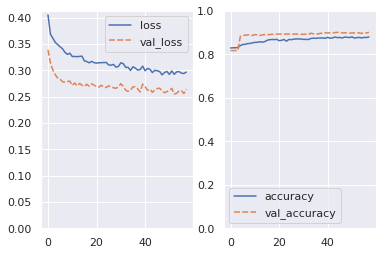

In [ ]:
df = pd.DataFrame(histories_over[study_over.best_trial.number])
plt.figure(figsize=(18,9))
f, axes = plt.subplots(1, 2)

ax = sns.lineplot( data=df[['loss', 'val_loss']],ax=axes[0])
ax.set_ylim(0)

ax = sns.lineplot(data=df[['accuracy', 'val_accuracy']], ax=axes[1])
ax.set_ylim(0, 1)

In [ ]:
study_over.best_params

{'l1_neurons': 28,
 'l1_activation': 'relu',
 'dr1': 0.2997236161149368,
 'l2_neurons': 4,
 'l2_activation': 'softplus',
 'dr2': 0.4200392116542427,
 'l3_neurons': 14,
 'l3_activation': 'sigmoid',
 'dr3': 0.33038463658421785,
 'l4_neurons': 13,
 'l4_activation': 'softplus',
 'dr4': 0.28669080559840876,
 'l5_neurons': 28,
 'l5_activation': 'relu'}

In [ ]:
inputs = Input((input_dim,))
x = Dense(28)(inputs) 
#x = BatchNormalization()(x)   
x = Activation("relu")(x)
x = Dropout(0.2997236161149368)(x)

x = Dense(4)(x) 
#x = BatchNormalization()(x)   
x = Activation("softplus")(x)
x = Dropout(0.4200392116542427)(x)

x = Dense(14)(x) 
#x = BatchNormalization()(x)   
x = Activation("sigmoid")(x)
x = Dropout(0.33038463658421785)(x)
                                 
x = Dense(13)(x) 
#x = BatchNormalization()(x)   
x = Activation("softplus")(x)
x = Dropout(0.28669080559840876)(x)

x = Dense(28)(x) 
#x = BatchNormalization()(x)   
x = Activation("relu")(x)
outputs = Dense(1, activation='sigmoid')(x)  
model_over =keras.models.Model(inputs, outputs)

In [ ]:
esc = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
sch = PolynomialDecay(initial_learning_rate=1e-2, decay_steps=60, end_learning_rate=5e-4)
optimizer = tf.keras.optimizers.Adam(learning_rate=sch)
model_over.compile(
  optimizer,
      #optimizer=optimizers.RMSprop(learning_rate=sch),
  loss='binary_crossentropy', 
  metrics=['accuracy']
  )
history_over = model_over.fit(train_dataset_over,
                    steps_per_epoch=STEPS_PER_EPOCH_OVER,
                    validation_steps=VALIDATION_STEPS_OVER,
                    epochs=60,
                    validation_data=test_dataset_over
                    #callbacks=[esc]
                    )

Epoch 1/60
237/237 [==============================] - 2s 3ms/step - loss: 0.4778 - accuracy: 0.8037 - val_loss: 0.4619 - val_accuracy: 0.7747
Epoch 2/60
237/237 [==============================] - 1s 3ms/step - loss: 0.4400 - accuracy: 0.8040 - val_loss: 0.3867 - val_accuracy: 0.7747
Epoch 3/60
237/237 [==============================] - 1s 3ms/step - loss: 0.4060 - accuracy: 0.8137 - val_loss: 0.3477 - val_accuracy: 0.8320
Epoch 4/60
237/237 [==============================] - 1s 2ms/step - loss: 0.3838 - accuracy: 0.8228 - val_loss: 0.3329 - val_accuracy: 0.8453
Epoch 5/60
237/237 [==============================] - 1s 2ms/step - loss: 0.3790 - accuracy: 0.8209 - val_loss: 0.3287 - val_accuracy: 0.8480
Epoch 6/60
237/237 [==============================] - 1s 2ms/step - loss: 0.3716 - accuracy: 0.8198 - val_loss: 0.3255 - val_accuracy: 0.8547
Epoch 7/60
237/237 [==============================] - 1s 2ms/step - loss: 0.3631 - accuracy: 0.8286 - val_loss: 0.3216 - val_accuracy: 0.8560
Epoch 

(0.0, 1.0)

<Figure size 1296x648 with 0 Axes>

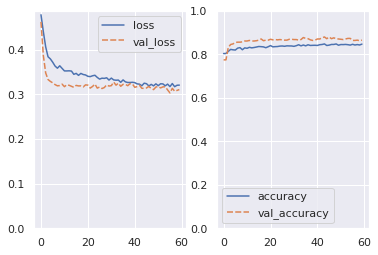

In [ ]:
df = pd.DataFrame(history_over.history)
plt.figure(figsize=(18,9))
f, axes = plt.subplots(1, 2)

ax = sns.lineplot( data=df[['loss', 'val_loss']],ax=axes[0])
ax.set_ylim(0)

ax = sns.lineplot(data=df[['accuracy', 'val_accuracy']], ax=axes[1])
ax.set_ylim(0, 1)

In [ ]:
y_pred_over=model_over.predict(X_test_std_over)
y_pred_over=list(map(lambda x: round(x), y_pred_over.reshape(-1)))

124/124 [==============================] - 0s 1ms/step


In [ ]:
print(classification_report(y_test_over,y_pred_over))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      3132
           1       0.82      0.42      0.56       830

    accuracy                           0.86      3962
   macro avg       0.84      0.70      0.74      3962
weighted avg       0.86      0.86      0.84      3962



In [ ]:
CM=confusion_matrix(y_test_over,y_pred_over)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print('f1',f1_score(y_test_over,y_pred_over,average='macro'))
print('TPR',TPR)
print('TNR',TNR)

f1 0.7906317000203305
TPR 0.5662650602409639
TNR 0.9581736909323116


##Undersampling

In [ ]:
undersample = RandomUnderSampler(sampling_strategy=0.60)

In [ ]:
X_under, y_under = undersample.fit_resample(X_dropped, y)

In [ ]:
X_train_under, X_test_val_under, y_train_under, y_test_val_under = train_test_split(X_under, y_under, test_size = 0.4, random_state = 0)
X_val_under, X_test_under, y_val_under, y_test_under= train_test_split(X_test_val_under, y_test_val_under, test_size = 0.5, random_state = 0)
sc = StandardScaler()
sc.fit(X_train_under)
X_train_std_under = sc.transform(X_train_under)
X_val_std_under = sc.transform(X_val_under)
X_test_std_under = sc.transform(X_test_under)


In [ ]:
Counter(y_under)

Counter({0: 5430, 1: 3258})

In [ ]:
train_under = tf.data.Dataset.from_tensor_slices((X_train_std_under, y_train_under))
val_under = tf.data.Dataset.from_tensor_slices((X_val_std_under, y_val_under))
test_under = tf.data.Dataset.from_tensor_slices((X_test_std_under, y_test_under))

In [ ]:
val_size_under=len(list(test_under)) 
train_size_under=len(list(train_under))
VALIDATION_STEPS_UNDER = val_size_under//BATCH_SIZE//VAL_SUBSPLITS
STEPS_PER_EPOCH_UNDER = train_size_under // BATCH_SIZE

In [ ]:
train_dataset_under = train_under.shuffle(BUFFER_SIZE).cache().batch(BATCH_SIZE).repeat()
train_dataset_under = train_dataset_under.prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset_under = test_under.batch(BATCH_SIZE)
val_dataset_under = val_under.batch(BATCH_SIZE)


###Keras RUS

In [ ]:
tf.random.set_seed(4)
histories_under=[]
def optuna_objective_under(trial: optuna.trial.Trial):
    esc = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
    model = keras.Sequential(
        [
            layers.Input(input_dim,),
            layers.Dense(
                units=trial.suggest_int('l1_neurons', 16, 128),
                activation=trial.suggest_categorical('l1_activation', ['sigmoid','softplus', 'relu'])
            ),
            layers.Dropout(rate=trial.suggest_uniform('dr1', 0.1, 0.5)),
            layers.Dense(
                units=trial.suggest_int('l2_neurons', 4, 64),
                activation=trial.suggest_categorical('l2_activation', ['sigmoid','softplus' ,'relu'])
            ),
            layers.Dropout(rate=trial.suggest_uniform('dr2', 0.1, 0.5)),
            layers.Dense(
                units=trial.suggest_int('l3_neurons', 4, 64),
                activation=trial.suggest_categorical('l3_activation', ['sigmoid','softplus', 'relu'])
            ),
            layers.Dropout(rate=trial.suggest_uniform('dr3', 0.1, 0.5)),
            layers.Dense(
                units=trial.suggest_int('l4_neurons', 4, 32),
                activation=trial.suggest_categorical('l4_activation', ['sigmoid','softplus', 'relu'])
            ),
            layers.Dropout(rate=trial.suggest_uniform('dr4', 0.1, 0.5)),
            layers.Dense(
                units=trial.suggest_int('l5_neurons', 4, 32),
                activation=trial.suggest_categorical('l5_activation', ['sigmoid', 'relu'])
            ),
            layers.Dense(1, activation=activations.sigmoid)
            ])
    sch = PolynomialDecay(initial_learning_rate=1e-2, decay_steps=EPOCH, end_learning_rate=5e-4)
    optimizer = tf.keras.optimizers.Adam(learning_rate=sch)
    model.compile(
    optimizer,
    #optimizer=optimizers.RMSprop(learning_rate=sch),
    loss='binary_crossentropy', 
    #metrics=[keras.metrics.Accuracy,keras.metrics.Recall,keras.metrics.AUC]
    metrics=['accuracy','AUC']
    )
    history = model.fit(train_dataset_under,
                        steps_per_epoch=STEPS_PER_EPOCH,
                        validation_steps=VALIDATION_STEPS,
                        epochs=EPOCH,
                        validation_data=val_dataset_under, 
                        verbose=0,
                        callbacks=[esc])
    histories_under.append(history.history)
    accuracy = history.history['val_accuracy'][-1]
    return accuracy

In [ ]:
study_under= optuna.create_study(direction='maximize')

[I 2022-12-22 13:01:08,136] A new study created in memory with name: no-name-6b94c259-26ef-4186-a580-1351e068b8ad


In [ ]:
study_under.optimize(optuna_objective_under, n_trials=50)

<ipython-input-52-be3c9c9b38c4>:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  layers.Dropout(rate=trial.suggest_uniform('dr1', 0.1, 0.5)),
<ipython-input-52-be3c9c9b38c4>:17: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  layers.Dropout(rate=trial.suggest_uniform('dr2', 0.1, 0.5)),
<ipython-input-52-be3c9c9b38c4>:22: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use :func:`~optuna.trial.Trial.suggest_float` instead.
  layers.Dropout(rate=trial.suggest_uniform('dr3', 0.1, 0.5)),
<ipython-input-52-be3c9c9b38c4>:27: FutureWarning: suggest

(0.0, 1.0)

<Figure size 1296x648 with 0 Axes>

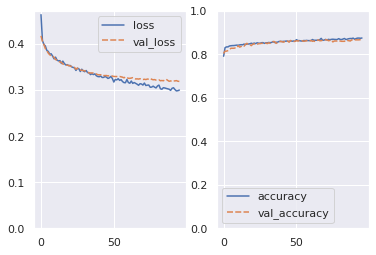

In [ ]:
df = pd.DataFrame(histories_under[study_under.best_trial.number])
plt.figure(figsize=(18,9))
f, axes = plt.subplots(1, 2)

ax = sns.lineplot( data=df[['loss', 'val_loss']],ax=axes[0])
ax.set_ylim(0)

ax = sns.lineplot(data=df[['accuracy', 'val_accuracy']], ax=axes[1])
ax.set_ylim(0, 1)

In [ ]:
study_under.best_params

{'l1_neurons': 45,
 'l1_activation': 'relu',
 'dr1': 0.3521588013460155,
 'l2_neurons': 38,
 'l2_activation': 'softplus',
 'dr2': 0.44066331019165106,
 'l3_neurons': 51,
 'l3_activation': 'sigmoid',
 'dr3': 0.3993027196838738,
 'l4_neurons': 28,
 'l4_activation': 'softplus',
 'dr4': 0.1616599965933643,
 'l5_neurons': 14,
 'l5_activation': 'relu'}

In [ ]:
inputs = Input((16,))
x = Dense(45)(inputs) 
#x = BatchNormalization()(x)   
x = Activation("relu")(x)
x = Dropout(0.3521588013460155)(x)

x = Dense(38)(x) 
#x = BatchNormalization()(x)   
x = Activation("softplus")(x)
x = Dropout(0.44066331019165106)(x)

x = Dense(51)(x) 
#x = BatchNormalization()(x)   
x = Activation("sigmoid")(x)
x = Dropout(0.3993027196838738)(x)
                                 
x = Dense(28)(x) 
#x = BatchNormalization()(x)   
x = Activation("softplus")(x)
x = Dropout(0.1616599965933643)(x)

x = Dense(14)(x) 
#x = BatchNormalization()(x)   
x = Activation("relu")(x)
outputs = Dense(1, activation='sigmoid')(x)  
model_under =keras.models.Model(inputs, outputs)

In [ ]:
esc = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
sch = PolynomialDecay(initial_learning_rate=1e-2, decay_steps=100, end_learning_rate=5e-4)
optimizer = tf.keras.optimizers.Adam(learning_rate=sch)
model_under.compile(
  optimizer,
      #optimizer=optimizers.RMSprop(learning_rate=sch),
  loss='binary_crossentropy', 
  metrics=['accuracy']
  )
history_under = model_under.fit(train_dataset_under,
                    steps_per_epoch=STEPS_PER_EPOCH_UNDER,
                    validation_steps=VALIDATION_STEPS_UNDER,
                    epochs=100,
                    validation_data=test_dataset_under
                    #callbacks=[esc]
                    )


Epoch 1/100
104/104 [==============================] - 1s 4ms/step - loss: 0.4682 - accuracy: 0.7879 - val_loss: 0.3624 - val_accuracy: 0.8600
Epoch 2/100
104/104 [==============================] - 0s 3ms/step - loss: 0.4021 - accuracy: 0.8340 - val_loss: 0.3562 - val_accuracy: 0.8533
Epoch 3/100
104/104 [==============================] - 0s 2ms/step - loss: 0.4011 - accuracy: 0.8388 - val_loss: 0.3483 - val_accuracy: 0.8600
Epoch 4/100
104/104 [==============================] - 0s 3ms/step - loss: 0.3957 - accuracy: 0.8367 - val_loss: 0.3446 - val_accuracy: 0.8500
Epoch 5/100
104/104 [==============================] - 0s 2ms/step - loss: 0.3903 - accuracy: 0.8394 - val_loss: 0.3397 - val_accuracy: 0.8533
Epoch 6/100
104/104 [==============================] - 0s 2ms/step - loss: 0.3840 - accuracy: 0.8450 - val_loss: 0.3347 - val_accuracy: 0.8500
Epoch 7/100
104/104 [==============================] - 0s 3ms/step - loss: 0.3845 - accuracy: 0.8417 - val_loss: 0.3358 - val_accuracy: 0.8533

(0.0, 1.0)

<Figure size 1296x648 with 0 Axes>

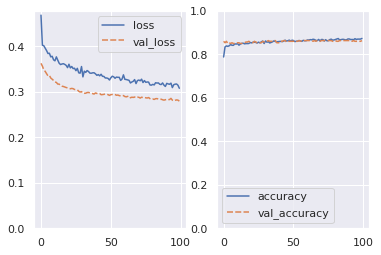

In [ ]:
df = pd.DataFrame(history_under.history)
plt.figure(figsize=(18,9))
f, axes = plt.subplots(1, 2)

ax = sns.lineplot( data=df[['loss', 'val_loss']],ax=axes[0])
ax.set_ylim(0)

ax = sns.lineplot(data=df[['accuracy', 'val_accuracy']], ax=axes[1])
ax.set_ylim(0, 1)

In [ ]:
y_pred_under=model_under.predict(X_test_std_under)
y_pred_under=list(map(lambda x: round(x), y_pred_under.reshape(-1)))

55/55 [==============================] - 0s 1ms/step


In [ ]:
CM=confusion_matrix(y_test_under,y_pred_under)
TN = CM[0][0]
FN = CM[1][0]
TP = CM[1][1]
FP = CM[0][1]


# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP) 
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Negative predictive value
NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)

# Overall accuracy
ACC = (TP+TN)/(TP+FP+FN+TN)
print('f1',f1_score(y_test_under,y_pred_under,average='macro'))
print('TPR',TPR)
print('TNR',TNR)

f1 0.8536200092051458
TPR 0.820627802690583
TNR 0.8868101028999065
